In [3]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN

#%cd ./drive/MyDrive/EmbeddedCasestudy/CSV
# Using a pandas dataframe to load the data from recordings
#sitting
df_sitting1 = pd.read_csv('/recordings/Sitting 1.csv')
df_sitting1.head()
df_sitting1.drop(['Time (s)'],axis=1,inplace=True)
dataset_sit1 = np.array(df_sitting1)
x_dataset_sit1=dataset_sit1[1000:-1000,:3]

df_sitting2 = pd.read_csv('/recordings/Sitting 2.csv')
df_sitting2.head()
df_sitting2.drop(['Time (s)'],axis=1,inplace=True)
dataset_sit2 = np.array(df_sitting2)
x_dataset_sit2=dataset_sit2[1000:-1000,:3]

#walking
df_walking1 = pd.read_csv('/recordings/Walking 1.csv')
df_walking1.head()
df_walking1.drop(['Time (s)'],axis=1,inplace=True)
dataset_walk1 = np.array(df_walking1)
x_dataset_walk1=dataset_walk1[1000:-1000,:3]

df_walking2 = pd.read_csv('/recordings/Walking 2.csv')
df_walking2.head()
df_walking2.drop(['Time (s)'],axis=1,inplace=True)
dataset_walk2 = np.array(df_walking2)
x_dataset_walk2=dataset_walk2[1000:-1000,:3]

#running
df_run1 = pd.read_csv('/recordings/Running 1.csv')
df_run1.head()
df_run1.drop(['Time (s)'],axis=1,inplace=True)
dataset_run1 = np.array(df_run1)
x_dataset_run1=dataset_run1[1000:14000,:3]

df_run2 = pd.read_csv('/recordings/Running 2.csv')
df_run2.head()
df_run2.drop(['Time (s)'],axis=1,inplace=True)
dataset_run2 = np.array(df_run2)
x_dataset_run2=dataset_run2[1000:-1000,:3]


print(x_dataset_sit1.shape, x_dataset_sit2.shape, x_dataset_walk1.shape, x_dataset_walk2.shape, x_dataset_run1.shape, x_dataset_run2.shape)



ModuleNotFoundError: No module named 'numpy'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_dataset_sit1 = scaler.fit_transform(x_dataset_sit1)
plt.plot(x_dataset_sit1)

ModuleNotFoundError: No module named 'sklearn'

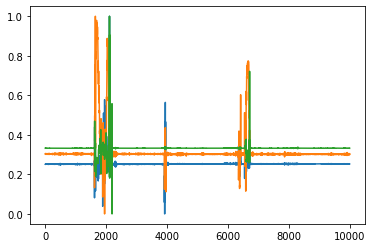

In [ ]:
x_dataset_sit2 = scaler.fit_transform(x_dataset_sit2)
plt.plot(x_dataset_sit2)

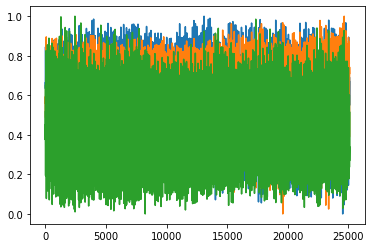

In [ ]:
x_dataset_walk1 = scaler.fit_transform(x_dataset_walk1)
plt.plot(x_dataset_walk1)

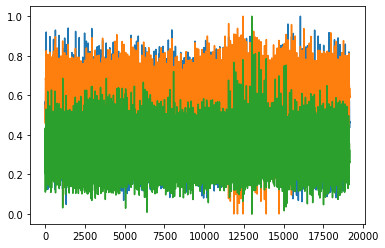

In [ ]:
x_dataset_walk2 = scaler.fit_transform(x_dataset_walk2)
plt.plot(x_dataset_walk2)

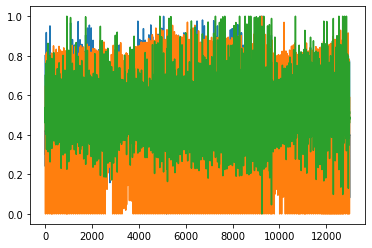

In [ ]:
x_dataset_run1 = scaler.fit_transform(x_dataset_run1)
plt.plot(x_dataset_run1)

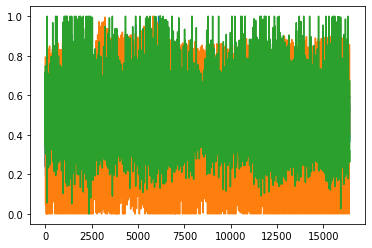

In [ ]:
x_dataset_run2 = scaler.fit_transform(x_dataset_run2)
plt.plot(x_dataset_run2)

In [ ]:
x_dataset_walk1[2600]

array([0.57462276, 0.63192488, 0.4340982 ])

In [ ]:
import tensorflow as tf
#getdata function creates data for training gru model
#data is the raw dataset, three acc columns
#datatype 0 = sitting , 1 = walking, 2 = running
# lookback is the sample rate
# interval defines time interval
# fr is the dataset frequency
def getdata(data, datatype, lookback, interval,fr):
  finterval=interval*fr
  period=finterval//(lookback-1) #period= steps of extracing data
  X,Y=[],[]
  for i in range(len(data)-finterval):
    samplelist=[]
    for j in range(lookback):
      samplelist.append(data[i+(j*period),:3])
    X.append(samplelist)
    Y.append(datatype)
    # one hot encoding
  Y = tf.one_hot(Y, 3).numpy()
  return np.array(X),np.array(Y)
lookback=5
interval=60
fr=100

x_processed_sit1,y_processed_sit1=getdata(x_dataset_sit1, 0,lookback,interval,fr)
x_processed_sit2,y_processed_sit2=getdata(x_dataset_sit2, 0,lookback,interval,fr)
x_processed_walk1,y_processed_walk1=getdata(x_dataset_walk1, 1,lookback,interval,fr)
x_processed_walk2,y_processed_walk2=getdata(x_dataset_walk2, 1,lookback,interval,fr)
x_processed_run1,y_processed_run1=getdata(x_dataset_run1, 2,lookback,interval,fr)
x_processed_run2,y_processed_run2=getdata(x_dataset_run2, 2,lookback,interval,fr)

print(x_processed_sit1.shape,x_processed_sit2.shape,y_processed_walk1.shape,y_processed_walk2.shape,x_processed_run1.shape,x_processed_run2.shape)

(5460, 5, 3) (4000, 5, 3) (19107, 3) (13161, 3) (7000, 5, 3) (10414, 5, 3)


In [ ]:
X_sit=np.concatenate((x_processed_sit1,x_processed_sit2),axis=0)
X_walk=np.concatenate((x_processed_walk1,x_processed_walk2),axis=0)
X_run=np.concatenate((x_processed_run1,x_processed_run2),axis=0)
print(X_sit.shape,X_walk.shape,X_run.shape)

(9460, 5, 3) (32268, 5, 3) (17414, 5, 3)


In [ ]:
X_walk[200:210]

array([[[0.7717775 , 0.65456071, 0.43439428],
        [0.63244331, 0.68504359, 0.29523809],
        [0.49867935, 0.65217975, 0.36827042],
        [0.90588143, 0.82608988, 0.37162596],
        [0.7010382 , 0.70191147, 0.41307673]],

       [[0.80773556, 0.74694836, 0.41766593],
        [0.63275713, 0.72538565, 0.22279793],
        [0.50009151, 0.66599598, 0.38968665],
        [0.85402337, 0.75647218, 0.2888231 ],
        [0.7101127 , 0.70647217, 0.42245251]],

       [[0.82096812, 0.78051644, 0.35317049],
        [0.61706634, 0.73169014, 0.22921293],
        [0.50780617, 0.67451376, 0.37932396],
        [0.77601401, 0.68108652, 0.25299778],
        [0.71835037, 0.71606305, 0.4417962 ]],

       [[0.81934674, 0.77303823, 0.3202566 ],
        [0.59996338, 0.72810194, 0.31936837],
        [0.50958445, 0.66609658, 0.34798914],
        [0.71866418, 0.62313883, 0.24653344],
        [0.72167158, 0.72505031, 0.47554898]],

       [[0.80057009, 0.7343729 , 0.3055021 ],
        [0.59750515, 0.723

In [ ]:
#y_sit1 = tf.one_hot(y_processed_sit1, 3).numpy()
#y_sit2 = tf.one_hot(y_processed_sit2, 3).numpy()
Y_sit=np.concatenate((y_processed_sit1,y_processed_sit2),axis=0)

#y_walk1 = tf.one_hot(y_processed_walk1, 3).numpy()
#y_walk2 = tf.one_hot(y_processed_walk2, 3).numpy()
Y_walk=np.concatenate((y_processed_walk1,y_processed_walk2),axis=0)

#y_run1 = tf.one_hot(y_processed_run1, 3).numpy()
#y_run2 = tf.one_hot(y_processed_run2, 3).numpy()
Y_run=np.concatenate((y_processed_run1,y_processed_run2),axis=0)

print(Y_sit.shape, Y_walk.shape, Y_run.shape)

(9460, 3) (32268, 3) (17414, 3)


In [ ]:
Y_run[2000]

array([0., 0., 1.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_sit_train, X_sit_test, Y_sit_train, Y_sit_test = train_test_split(X_sit, Y_sit, test_size=0.2, random_state=0)
X_walk_train, X_walk_test, Y_walk_train, Y_walk_test = train_test_split(X_walk, Y_walk, test_size=0.2, random_state=0)
X_run_train, X_run_test, Y_run_train, Y_run_test = train_test_split(X_run, Y_run, test_size=0.2, random_state=0)

print(X_sit_train.shape, X_sit_test.shape, Y_walk_train.shape, Y_walk_test.shape, X_run_train.shape, Y_run_test.shape)

(7568, 5, 3) (1892, 5, 3) (25814, 3) (6454, 3) (13931, 5, 3) (3483, 3)


In [ ]:
X_train= np.concatenate((X_sit_train, X_walk_train, X_run_train), axis=0)
X_test=np.concatenate((X_sit_test, X_walk_test, X_run_test), axis=0)
Y_train= np.concatenate((Y_sit_train, Y_walk_train, Y_run_train), axis=0)
Y_test=np.concatenate((Y_sit_test, Y_walk_test, Y_run_test), axis=0)



In [ ]:
X_train[7565:7570]

In [ ]:
Y_train[7565:7570]

In [ ]:
model=Sequential()
model.add(LSTM(20,input_shape=(lookback,3)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 20)                1500      
                                                                 
 dense_10 (Dense)            (None, 4)                 84        
                                                                 
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 1,599
Trainable params: 1,599
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, batch_size=1, epochs=5)

#plt.figure(figsize=(14,5))
#plt.plot(y_test, label = 'y_test')
#plt.plot(y_pred, label = 'y_pred')
#plt.legend()
#plt.show()

Epoch 1/5
47313/47313 [==============================] - 150s 3ms/step - loss: 0.0340 - accuracy: 0.9301
Epoch 2/5
47313/47313 [==============================] - 148s 3ms/step - loss: 0.0150 - accuracy: 0.9727
Epoch 3/5
47313/47313 [==============================] - 145s 3ms/step - loss: 0.0128 - accuracy: 0.9767
Epoch 4/5
47313/47313 [==============================] - 146s 3ms/step - loss: 0.0116 - accuracy: 0.9795
Epoch 5/5
47313/47313 [==============================] - 148s 3ms/step - loss: 0.0116 - accuracy: 0.9795


In [ ]:
model.evaluate(X_test, Y_test)
#y_pred=model.predict(X_test)

370/370 [==============================] - 2s 3ms/step - loss: 0.0081 - accuracy: 0.9865


[0.008086304180324078, 0.9864739179611206]

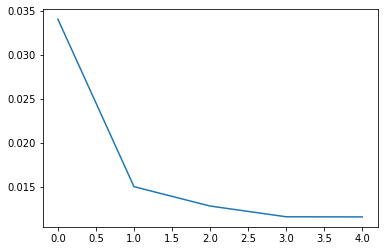

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

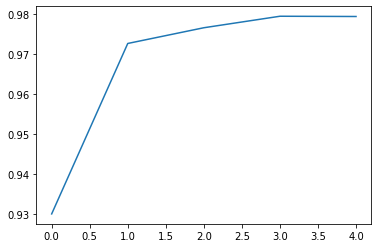

In [ ]:
plt.plot(history.history['accuracy'])
